In [10]:
import numpy as np
import pandas as pd
import os


"""
This will load a csv file and return a pandas dataframe
@input: filepath:: string :: filepath of csv file
@input: names:: list :: column names list 
"""
def load_csv(filepath, names=None):
    filepath =  os.path.abspath(filepath)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath, names=names, encoding='utf-8')
        return df
    
    return None

filepath = "data/titanic.csv"
# Create a pandas dataframe using file csv data
df = load_csv(filepath)
# shows the first 5 rows in the dataframe
df.head()
    

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [13]:
# this will give you the data distribution per column
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


Observation on the data on a high level
1. Total number of passengers on board is 887, of which 38% of people have survived.
2. The average age is 29.4 years with range of 0.42years to 80years.
3. The Average fare is 32.3, with range of 0 to 512.3
4. 75% of population have age 38years or below
5. Atleast 50% of population have purchased 3rd class tickets

In [19]:
df[df["Survived"]==1].count()/df.count()

Survived                   0.385569
Pclass                     0.385569
Name                       0.385569
Sex                        0.385569
Age                        0.385569
Siblings/Spouses Aboard    0.385569
Parents/Children Aboard    0.385569
Fare                       0.385569
dtype: float64

In [23]:
df[df["Pclass"]==3].count()/df.count()

Survived                   0.549042
Pclass                     0.549042
Name                       0.549042
Sex                        0.549042
Age                        0.549042
Siblings/Spouses Aboard    0.549042
Parents/Children Aboard    0.549042
Fare                       0.549042
dtype: float64

In [27]:
df1 = df.groupby(['Sex'])
df1.describe()

Survived                                              Pclass            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
Sex                                                                             
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0  314.0  2.159236   
male      573.0  0.190227  0.392823  0.0  0.0  0.0  0.0  1.0  573.0  2.385689   

        ... Parents/Children Aboard        Fare                              \
        ...                     75%  max  count       mean        std   min   
Sex     ...                                                                   
female  ...                     1.0  6.0  314.0  44.479818  57.997698  6.75   
male    ...                     0.0  5.0  573.0  25.633935  43.267730  0.00   

                                            
              25%      50%   75%       max  
Sex                                         
female  12.071875  23.0000  55.0  512.3292  
male     7.895800  11.1333  27.0  512.3292  

[2 rows x 48 columns]

Observations
1. There were 314 women and 573 men onbaord the titanic which a sex ratio of 1:1.82 women against men.
2. The ratio of women who have survived is 74% against the ratio of men who have survived is 19%

Text(0.5, 1.0, 'Frequency Distribution of fare ticket class')

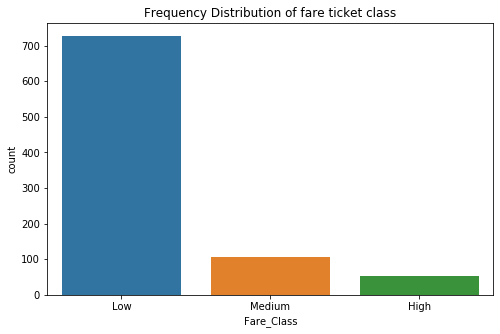

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# 0 - 50    : Low Fare
# 50 - 100  : Medium Fare
# 100 - Max : High Fare

df['Fare_Class'] = pd.cut(df['Fare'], bins = [-1,50,100,df['Fare'].max()], labels=['Low','Medium','High'])

plt.figure(figsize=(8,5))
sns.countplot(x = 'Fare_Class', data = df)
plt.title('Frequency Distribution of fare ticket class')

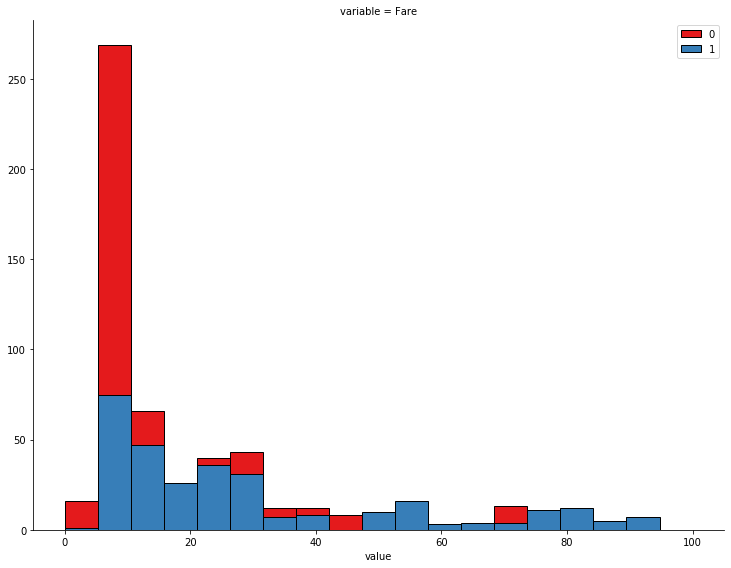

In [90]:
df2 = pd.melt(df, id_vars=['Survived'], value_vars=["Fare"])
bins=np.linspace(df2.value.min(), 100, 20)
g = sns.FacetGrid(df2, col="variable", hue="Survived", hue_order=[0,1], palette="Set1", col_wrap=2, height=8, aspect=1.25)
g.map(plt.hist, 'value', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Observations
1. The percentage of survived against non survived is plotted against two ranges one betwen fares 0-100 and other above hundred. 
2. There are outliers in fares which can be seen in 500 range fares.
3. In Graph 2 the percentage of people who have survived for higher fare range is more (Red == Survived, Blue==Not Survived)
4. In graph 1 for lower fare range graph the percentage of people who have not survived is more (Red == Not survived, blue==survived)